## 6.3 Geographic Visualizations

### 1. Import Data and Libraries
### 2. Data Wrangle
### 3. Data Cleaning
### 4. Aggregating averages
### 5. Ploting Choropleth
### 6. Results

### 1. Import Data and Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap
from folium.features import GeoJsonPopup, GeoJsonTooltip
import os
import folium 
import json
import geopandas as gpd

In [4]:
 # This command propts matplotlib visuals to appear in the notebook
%matplotlib inline 

In [5]:
import sys
sys.executable

'C:\\Users\\sandu\\Anaconda3\\python.exe'

In [6]:
import sys
sys.prefix

'C:\\Users\\sandu\\Anaconda3'

In [75]:
# Create path 
path = r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\3 Data\Prepared Data'
path1 =r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\4 Analytics\Visualizations'

In [73]:
# Import ".json" file for Berlin
berlin = "https://raw.githubusercontent.com/funkeinteraktiv/Berlin-Geodaten/master/berlin_bezirke.geojson"

In [74]:
# Define column types
dtype_options = {'15':str}

In [76]:
# Import data
df = pd.read_csv(os.path.join(path,'AirBnB_cleaned2.csv'), index_col = False)

C:\Users\sandu\AppData\Local\Temp\ipykernel_11060\2636293103.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,'AirBnB_cleaned2.csv'), index_col = False)


In [77]:
# Display all columns 
pd.set_option('display.max_columns', None)

### 2. Data Wrangle

In [16]:
df.head(3)

,Unnamed: 0,index,Review ID,Review_Date,Reviewer ID,Rating_Comment,Listing ID,Listing Name,Host ID,Host Since,Host Response Time,Host Response Rate,Is Superhost,Neighborhood,Neighborhood Group,City,Postal Code,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price category,Rating Category,Accomodation Size
0,0,0,58660447,2016-01-03,14876562,"Very nice, clean appartement! Josh was really ...",10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,2015-09-20,NaN,NaN,False,NeukÃ¶lln,NeukÃ¶lln,Berlin,12047.0,Germany,52.49234,13.42994,Apartment,Entire home/apt,4,1.0,2.0,2.0,60.0,1,1,1,2016-01-03,2016-01-03,100.0,8.0,10.0,6.0,10.0,10.0,10.0,False,False,Middle price,Good Rating,Couple Accomodation
1,1,2,58663795,2016-01-03,49367757,Aki is really nice and friendly. We had an ama...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
2,2,3,59003619,2016-01-05,46694292,Aki is a very nice dude with a clean place in ...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation


In [78]:
# Data shape
df.shape

(452805, 44)

In [18]:
# Reset index column
df = df.reset_index(drop=True)

In [20]:
df.shape

(452805, 44)

In [79]:
# Create list of coumns
columns_to_encode = ['Listing Name', 'Neighborhood', 'Neighborhood Group', 'Rating_Comment']

In [80]:
# encode columns with german text and ä,ö,ü characters]
# encode to utf-8 and decode to utf-8 after
for column in columns_to_encode:
    df[column] = df[column].apply(lambda x: str(x).encode('utf-8').decode('utf-8'))

In [81]:
df['Neighborhood Group'].value_counts()

Neighborhood Group
Mitte                       116945
Friedrichshain-Kreuzberg    105971
Pankow                       80208
NeukÃ¶lln                    50860
Charlottenburg-Wilm.         32474
Tempelhof - SchÃ¶neberg      29591
Lichtenberg                  11234
Treptow - KÃ¶penick           8970
Steglitz - Zehlendorf         6618
Reinickendorf                 5514
Marzahn - Hellersdorf         2707
Spandau                       1713
Name: count, dtype: int64

In [82]:
# Change districts name as per json file
df['Neighborhood Group'].replace('NeukÃ¶lln', 'Neukolln', inplace=True)

In [83]:
df['Neighborhood Group'].replace('Charlottenburg-Wilm', 'Charlottenburg-Wilmersdorf', inplace=True)

In [84]:
df['Neighborhood Group'].replace('Tempelhof - SchÃ¶neberg', 'Tempelhof-Schöneberg', inplace=True)

In [85]:
df['Neighborhood Group'].replace('Treptow - KÃ¶penick', 'Treptow-Köpenick', inplace=True)

In [86]:
df['Neighborhood Group'].value_counts()

Neighborhood Group
Mitte                       116945
Friedrichshain-Kreuzberg    105971
Pankow                       80208
Neukolln                     50860
Charlottenburg-Wilm.         32474
Tempelhof-Schöneberg         29591
Lichtenberg                  11234
Treptow-Köpenick              8970
Steglitz - Zehlendorf         6618
Reinickendorf                 5514
Marzahn - Hellersdorf         2707
Spandau                       1713
Name: count, dtype: int64

In [87]:
df.shape

(452805, 44)

### 3. Data Cleaning

In [88]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                   0
index                        0
Review ID                    0
Review_Date                  0
Reviewer ID                  0
Rating_Comment               0
Listing ID                   0
Listing Name                 0
Host ID                      0
Host Since                  38
Host Response Time       55964
Host Response Rate       55964
Is Superhost                 0
Neighborhood                 0
Neighborhood Group           0
City                         0
Postal Code               7586
Country                      0
Latitude                     0
Longitude                    0
Property Type                0
Room Type                    0
Accomodates                  0
Bathrooms                  937
Bedrooms                   709
Beds                        72
Price                        0
Guests Included              0
Min Nights                   0
Reviews                      0
First Review                 0
Last Review                  0
Overall 

In [89]:
# drop all rows where Review ID is null cause there were no reviews jet and I need the reviews for analyze. 
df = df.dropna(subset=['Overall Rating'], inplace=False)
df = df.dropna(subset=['Host Since'], inplace=False)
df = df.dropna(subset=['Postal Code'], inplace=False)
df = df.dropna(subset=['Bathrooms'], inplace=False)
df = df.dropna(subset=['Beds'], inplace=False)
df = df.dropna(subset=['Bedrooms'], inplace=False)
df = df.dropna(subset=['Accuracy Rating'], inplace=False)
df = df.dropna(subset=['Checkin Rating'], inplace=False)
df = df.dropna(subset=['Accomodation Size'], inplace=False)
df = df.dropna(subset=['Communication Rating'], inplace=False)
df = df.dropna(subset=['Cleanliness Rating'], inplace=False)
df = df.dropna(subset=['Value Rating'], inplace=False)
df = df.dropna(subset=['Location Rating'], inplace=False)

In [90]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                   0
index                        0
Review ID                    0
Review_Date                  0
Reviewer ID                  0
Rating_Comment               0
Listing ID                   0
Listing Name                 0
Host ID                      0
Host Since                   0
Host Response Time       53709
Host Response Rate       53709
Is Superhost                 0
Neighborhood                 0
Neighborhood Group           0
City                         0
Postal Code                  0
Country                      0
Latitude                     0
Longitude                    0
Property Type                0
Room Type                    0
Accomodates                  0
Bathrooms                    0
Bedrooms                     0
Beds                         0
Price                        0
Guests Included              0
Min Nights                   0
Reviews                      0
First Review                 0
Last Review                  0
Overall 

In [91]:
# Replacing all NaN values under "name" with 'Unknown'
df.fillna({'Host Response Time':'Unknown'}, inplace=True)
df.fillna({'Host Response Rate':'Unknown'}, inplace=True)

In [92]:
df.head(10)

,Unnamed: 0,index,Review ID,Review_Date,Reviewer ID,Rating_Comment,Listing ID,Listing Name,Host ID,Host Since,Host Response Time,Host Response Rate,Is Superhost,Neighborhood,Neighborhood Group,City,Postal Code,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price category,Rating Category,Accomodation Size
0,0,0,58660447,2016-01-03,14876562,"Very nice, clean appartement! Josh was really ...",10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,2015-09-20,Unknown,Unknown,False,NeukÃ¶lln,Neukolln,Berlin,12047.0,Germany,52.49234,13.42994,Apartment,Entire home/apt,4,1.0,2.0,2.0,60.0,1,1,1,2016-01-03,2016-01-03,100.0,8.0,10.0,6.0,10.0,10.0,10.0,False,False,Middle price,Good Rating,Couple Accomodation
1,1,2,58663795,2016-01-03,49367757,Aki is really nice and friendly. We had an ama...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
2,2,3,59003619,2016-01-05,46694292,Aki is a very nice dude with a clean place in ...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
3,3,4,66845661,2016-03-25,54542819,Aki's place was easy to find and located in th...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
4,4,5,67969785,2016-04-01,35352843,We had to wait 30mins for Aki to arrive but ot...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
5,5,6,68816282,2016-04-06,48006291,"Great room, very comfortable and clean. Aki an...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
6,6,7,69289363,2016-04-10,63759402,Aki was really friendly and available giving u...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
7,7,8,69780867,2016-04-13,53960263,Aki es sin duda el mejor host q uno puede tene...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
8,8,9,70426866,2016-04-17,26184931,"We did not meer Aki, but we did meet FabiÃ¡n, ...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,M

In [93]:
# Dropping columns that contain PII data and are irrelavant for this analysis: 
df.drop(['Unnamed: 0', 'index', 'Neighborhood', ], axis=1, inplace=True)
df.head()

,Review ID,Review_Date,Reviewer ID,Rating_Comment,Listing ID,Listing Name,Host ID,Host Since,Host Response Time,Host Response Rate,Is Superhost,Neighborhood Group,City,Postal Code,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price category,Rating Category,Accomodation Size
0,58660447,2016-01-03,14876562,"Very nice, clean appartement! Josh was really ...",10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,2015-09-20,Unknown,Unknown,False,Neukolln,Berlin,12047.0,Germany,52.49234,13.42994,Apartment,Entire home/apt,4,1.0,2.0,2.0,60.0,1,1,1,2016-01-03,2016-01-03,100.0,8.0,10.0,6.0,10.0,10.0,10.0,False,False,Middle price,Good Rating,Couple Accomodation
1,58663795,2016-01-03,49367757,Aki is really nice and friendly. We had an ama...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
2,59003619,2016-01-05,46694292,Aki is a very nice dude with a clean place in ...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
3,66845661,2016-03-25,54542819,Aki's place was easy to find and located in th...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
4,67969785,2016-04-01,35352843,We had to wait 30mins for Aki to arrive but ot...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation


In [94]:
# Create Subset with column needed for geo analysis 

geo_subset = df[df['Price'] < 500][['Price','Accomodates', 'Beds', 'Overall Rating',
                'Cleanliness Rating', 'Location Rating', 'Value Rating', 'Neighborhood Group',]] 

# I know there are extreme values in the price column so I filter for price under 500, only 792 values filtered out 
# As I know from previous data cleaning all other columns should be ok for analysis

In [95]:
geo_subset.head(20)

,Price,Accomodates,Beds,Overall Rating,Cleanliness Rating,Location Rating,Value Rating,Neighborhood Group
0,60.0,4,2.0,100.0,10.0,10.0,10.0,Neukolln
1,35.0,2,1.0,92.0,8.0,10.0,9.0,Mitte
2,35.0,2,1.0,92.0,8.0,10.0,9.0,Mitte
3,35.0,2,1.0,92.0,8.0,10.0,9.0,Mitte
4,35.0,2,1.0,92.0,8.0,10.0,9.0,Mitte
5,35.0,2,1.0,92.0,8.0,10.0,9.0,Mitte
6,35.0,2,1.0,92.0,8.0,10.0,9.0,Mitte
7,35.0,2,1.0,92.0,8.0,10.0,9.0,Mitte
8,35.0,2,1.0,92.0,8.0,10.0,9.0,Mitte
9,35.0,2,1.0,92.0,8.0,10.0,9.0,Mitte


In [96]:
df.shape

(442906, 41)

In [103]:
# Check duplicates
dups = df.duplicated()

In [104]:
dups.shape
# N0 duplicates

(442906,)

In [105]:
geo_subset.shape

(442121, 8)

In [106]:
# Check missing values 
geo_subset.isnull().sum()

Price                 0
Accomodates           0
Beds                  0
Overall Rating        0
Cleanliness Rating    0
Location Rating       0
Value Rating          0
Neighborhood Group    0
dtype: int64

In [107]:
# Check values for neighborhood groups
geo_subset['Neighborhood Group'].value_counts()

Neighborhood Group
Mitte                       114166
Friedrichshain-Kreuzberg    103262
Pankow                       78638
Neukolln                     49016
Charlottenburg-Wilm.         31711
Tempelhof-Schöneberg         29089
Lichtenberg                  11017
Treptow-Köpenick              8875
Steglitz - Zehlendorf         6467
Reinickendorf                 5482
Marzahn - Hellersdorf         2700
Spandau                       1698
Name: count, dtype: int64

In [108]:
# Check duplicates
dups = geo_subset.duplicated()

In [109]:
dups.shape
# N0 duplicates

(442121,)

Text(0, 0.5, 'Count')

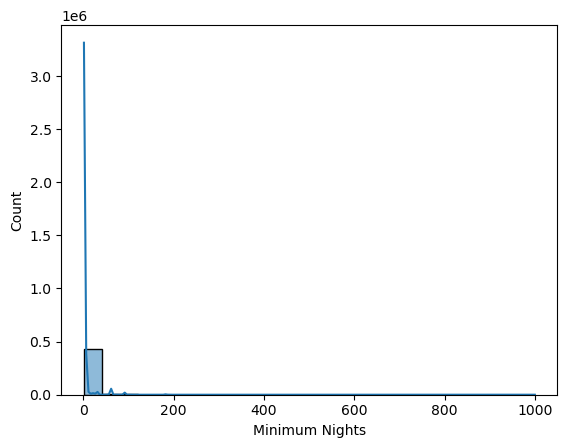

In [116]:
# Check the Min Nights variable
sns.histplot(df['Min Nights'], bins = 25, kde = True)
plt.xlabel("Minimum Nights")
plt.ylabel("Count")

In [118]:
# Remove extreme values greater than 3 standard deviation from minimum_nights
std = df['Min Nights'].std()
std_3 = 3 * std

df = df[df['Min Nights'] < std_3] 
df.shape

(431190, 41)

Text(0, 0.5, 'Count')

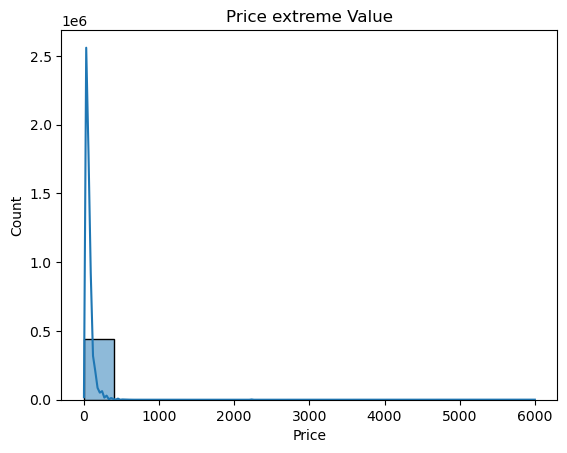

In [117]:
# Check the extreme value of price
sns.histplot(df['Price'], bins = 15, kde = True)
plt.title('Price extreme Value')
plt.xlabel("Price")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

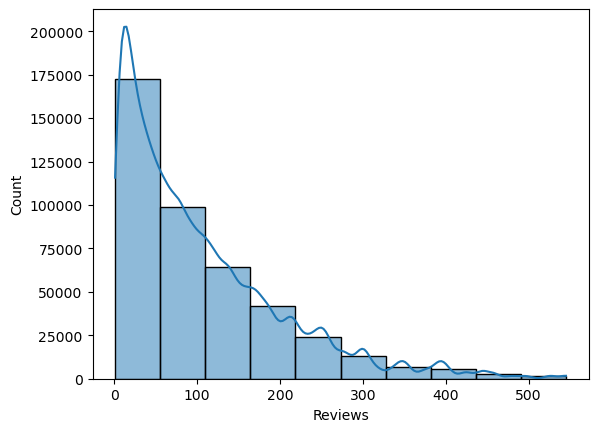

In [119]:
# Check the Reviews variable
sns.histplot(df['Reviews'], bins = 10, kde = True)
plt.xlabel("Reviews")
plt.ylabel("Count")

In [120]:
# Remove extreme values greater than 3 standard deviation from Reviews
std = df['Reviews'].std()
std_3 = 3 * std

df = df[df['Reviews'] < std_3] 
df.shape

(406402, 41)

In [121]:
df.columns

Index(['Review ID', 'Review_Date', 'Reviewer ID', 'Rating_Comment',
       'Listing ID', 'Listing Name', 'Host ID', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Is Superhost',
       'Neighborhood Group', 'City', 'Postal Code', 'Country', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accomodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready', 'Price category', 'Rating Category',
       'Accomodation Size'],
      dtype='object')

### 4. Aggregating averages

In [122]:
columns_for_mean = ['Price','Accomodates', 'Beds', 'Overall Rating',
                'Cleanliness Rating', 'Location Rating', 'Value Rating']

In [123]:
# Aggregate avg values for each neighborhood
avg_geo_subset = geo_subset.groupby('Neighborhood Group')[columns_for_mean].mean()
avg_geo_subset

,Price,Accomodates,Beds,Overall Rating,Cleanliness Rating,Location Rating,Value Rating
Neighborhood Group,,,,,,,
Charlottenburg-Wilm.,64.593643,3.093690,1.876951,93.999716,9.458390,9.594620,9.410583
Friedrichshain-Kreuzberg,64.857392,2.981639,1.843069,94.782020,9.473340,9.771010,9.435213
Lichtenberg,51.708269,3.113461,2.055732,94.536716,9.450758,9.181356,9.489698
Marzahn - Hellersdorf,51.235185,3.122593,2.424074,95.591111,9.764815,8.835185,9.591852
Mitte,79.104085,3.411051,2.092558,93.902940,9.487790,9.665058,9.342212
Neukolln,56.537784,2.848886,1.693263,94.504223,9.381488,9.467827,9.410499
Pankow,69.298329,3.069928,1.893817,94.947455,9.602838,9.718317,9.467611
Reinickendorf,41.310835,2.954214,1.956768,94.846954,9.524261,9.162714,9.556914
Spandau,47.565960,2.945819,2.049470,95.686690,9.492933,9.160777,9.563015


In [124]:
avg_geo_subset = avg_geo_subset.reset_index()
avg_geo_subset

,Neighborhood Group,Price,Accomodates,Beds,Overall Rating,Cleanliness Rating,Location Rating,Value Rating
0,Charlottenburg-Wilm.,64.593643,3.093690,1.876951,93.999716,9.458390,9.594620,9.410583
1,Friedrichshain-Kreuzberg,64.857392,2.981639,1.843069,94.782020,9.473340,9.771010,9.435213
2,Lichtenberg,51.708269,3.113461,2.055732,94.536716,9.450758,9.181356,9.489698
3,Marzahn - Hellersdorf,51.235185,3.122593,2.424074,95.591111,9.764815,8.835185,9.591852
4,Mitte,79.104085,3.411051,2.092558,93.902940,9.487790,9.665058,9.342212
5,Neukolln,56.537784,2.848886,1.693263,94.504223,9.381488,9.467827,9.410499
6,Pankow,69.298329,3.069928,1.893817,94.947455,9.602838,9.718317,9.467611
7,Reinickendorf,41.310835,2.954214,1.956768,94.846954,9.524261,9.162714,9.556914
8,Spandau,47.565960,2.945819,2.049470,95.686690,9.492933,9.160777,9.563015
9,Steglitz - Zehlendorf,52.438379,2.768981,1.802691,96.086593,9.715788,9.579712,9.545694


In [125]:
# Remove prices equal to or smaller than 0
df = df[df['Price'] > 0]
df.shape

(406402, 41)

### 5. Plot choropleths

In [126]:
# Create data subset with variables to plot 
price_plot = avg_geo_subset[['Neighborhood Group','Price']]
price_plot.head(10)

,Neighborhood Group,Price
0,Charlottenburg-Wilm.,64.593643
1,Friedrichshain-Kreuzberg,64.857392
2,Lichtenberg,51.708269
3,Marzahn - Hellersdorf,51.235185
4,Mitte,79.104085
5,Neukolln,56.537784
6,Pankow,69.298329
7,Reinickendorf,41.310835
8,Spandau,47.565960
9,Steglitz - Zehlendorf,52.438379


In [139]:
# Setting latitude and longitude
berlin_lat = df.Latitude.mean()
berlin_long = df.Longitude.mean()

In [167]:
# Choropleth map for Neighborhood Group with Price
map = folium.Map(location = [berlin_lat, berlin_long], zoom_start = 10)

# Capture the return of folium.Choropleth()
choropleth = folium.Choropleth(
    geo_data = berlin,
    data=price_plot,
    columns=['Neighborhood Group', 'Price'],
    key_on= 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color='PuBu',
    nan_fill_color='grey',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name = "Average Price",
).add_to(map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(fields=['name'],
                                   aliases=['district:'],
                                   labels=True,
                                   localize=True,
                                   sticky=False,
                                   style="""
                                   background-color: #F0EFEF;
                                   border: 2px solid black;
                                   border-radius: 3px;
                                   box-shadow: 2px;
                                   """,)
)
folium.LayerControl().add_to(map)

map

In [157]:
map.save(os.path.join(path1, 'Price per Neighborhood.html'))

In [158]:
# Create Subset for Cholopleth
Rating_plot = avg_geo_subset[['Neighborhood Group','Overall Rating']]
Rating_plot.head(12)

,Neighborhood Group,Overall Rating
0,Charlottenburg-Wilm.,93.999716
1,Friedrichshain-Kreuzberg,94.782020
2,Lichtenberg,94.536716
3,Marzahn - Hellersdorf,95.591111
4,Mitte,93.902940
5,Neukolln,94.504223
6,Pankow,94.947455
7,Reinickendorf,94.846954
8,Spandau,95.686690
9,Steglitz - Zehlendorf,96.086593


In [170]:
# Choropleth map for Neighborhood Group with Overall Rating
map_listing = folium.Map(location=[berlin_lat, berlin_long], zoom_start=10 )

choropleth = folium.Choropleth(
    geo_data= berlin,
    data= Rating_plot,
    columns=['Neighborhood Group', 'Overall Rating'],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    nan_fill_color='grey',
    fill_opacity=0.6,
    line_opacity=0.4,
    legend_name="Overall Rating by Neighborhood Group",
    reset=True,
).add_to(map_listing)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(fields=['name'],
                                   aliases=['district:'],
                                   labels=True,
                                   localize=True,
                                   sticky=False,
                                   style="""
                                   background-color: #F0EFEF;
                                   border: 2px solid black;
                                   border-radius: 3px;
                                   box-shadow: 3px;
                                   """,)
)
folium.LayerControl().add_to(map)
map_listing

In [172]:
map.save(os.path.join(path1, 'Overall Rating by Neighborhood Group.html'))

In [173]:
# Create Subset for Cholopleth
Value_Rating_plot = avg_geo_subset[['Neighborhood Group','Value Rating']]
Value_Rating_plot.head(12)

,Neighborhood Group,Value Rating
0,Charlottenburg-Wilm.,9.410583
1,Friedrichshain-Kreuzberg,9.435213
2,Lichtenberg,9.489698
3,Marzahn - Hellersdorf,9.591852
4,Mitte,9.342212
5,Neukolln,9.410499
6,Pankow,9.467611
7,Reinickendorf,9.556914
8,Spandau,9.563015
9,Steglitz - Zehlendorf,9.545694


In [174]:
# Choropleth map for Neighborhood Group with Value Rating
map_listing = folium.Map(location=[berlin_lat, berlin_long], zoom_start=10 )

choropleth = folium.Choropleth(
    geo_data= berlin,
    data= Value_Rating_plot,
    columns=['Neighborhood Group', 'Value Rating'],
    key_on="feature.properties.name",
    fill_color="GnBu",
    nan_fill_color='grey',
    fill_opacity=0.6,
    line_opacity=0.4,
    legend_name="Value Rating by Neighborhood Group",
    reset=True,
).add_to(map_listing)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(fields=['name'],
                                   aliases=['district:'],
                                   labels=True,
                                   localize=True,
                                   sticky=False,
                                   style="""
                                   background-color: #F0EFEF;
                                   border: 2px solid black;
                                   border-radius: 3px;
                                   box-shadow: 3px;
                                   """,)
)
folium.LayerControl().add_to(map)
map_listing

In [175]:
map.save(os.path.join(path1, 'Value Rating by Neighborhood Group.html'))

In [176]:
# Create Subset for Cholopleth
Accomodates_plot = avg_geo_subset[['Neighborhood Group','Accomodates']]
Accomodates_plot.head(12)

,Neighborhood Group,Accomodates
0,Charlottenburg-Wilm.,3.093690
1,Friedrichshain-Kreuzberg,2.981639
2,Lichtenberg,3.113461
3,Marzahn - Hellersdorf,3.122593
4,Mitte,3.411051
5,Neukolln,2.848886
6,Pankow,3.069928
7,Reinickendorf,2.954214
8,Spandau,2.945819
9,Steglitz - Zehlendorf,2.768981


In [177]:
# Choropleth map for Neighborhood Group with Accomodates
map_listing = folium.Map(location=[berlin_lat, berlin_long], zoom_start=10 )

choropleth = folium.Choropleth(
    geo_data= berlin,
    data= Accomodates_plot,
    columns=['Neighborhood Group', 'Accomodates'],
    key_on="feature.properties.name",
    fill_color="GnBu",
    nan_fill_color='grey',
    fill_opacity=0.6,
    line_opacity=0.4,
    legend_name="Accomodates by Neighborhood Group",
    reset=True,
).add_to(map_listing)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(fields=['name'],
                                   aliases=['district:'],
                                   labels=True,
                                   localize=True,
                                   sticky=False,
                                   style="""
                                   background-color: #F0EFEF;
                                   border: 2px solid black;
                                   border-radius: 3px;
                                   box-shadow: 3px;
                                   """,)
)
folium.LayerControl().add_to(map)
map_listing

In [178]:
map.save(os.path.join(path1, 'Accomodates by Neighborhood Group.html'))

### 6. Results

#### Questions answered with the plots

##### Have some neighborhoods far better ratings than others?
The average ratings are not very far from each other. But it is noticable that the district Mitte has the worst overall ratings.

##### Which neighborhood is most pricey and least pricey?
As I expected the districts in the city center are more pricey. The most expensive neighborhood is Mitte and the least expensive neighborhood is Reinickendorf.

##### Are there certain neighborhoods where the cleanliness rating is unusually low?
The worst cleanliness rating has Berlin Neukölln, but it isn't off that much. The best cleanliness rating has Marzahn - Hellersdorf and Steglitz - Zehlendorf.

##### Is the analysis leading to new research questions?
Why the prices in Pankow and Tempelhof - Schöneberg are relatively high in comparison?
Whats special about Steglitz - Zehlendorf? It has low price but the best rating.

### Export Data

In [179]:
# Export Dataset
df.to_csv(os.path.join(path,'AirBnB_cleaned3.csv'))